In [2]:
import sys
import numpy as np

In [3]:
np.__version__

'1.24.3'

## Implementing a perceptron learning algorithm in Python

In [61]:
class Perceptron:
    """Perceptron classifier
    
    Parameters
    ---------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
    
    Attributes
    -----------------
    w_ : 1d-array
        Weights after fitting
    b_ : Scalar
        Bias unit after fitting
    errors_ : list
        Number of misclassifications (updates) in each epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ----------------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and n_features is the number of features
        y : array-like, shape = [n_examples]
            Target values
        
        Returns
        ----------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # initial weights with small random numbers
        
        # self.w_ = np.zeros(X.shape[1]) # initializing weights with 0, will also work but the learning rate (eta)
                                         # will have no effect on the decision boudary, it will only affect the scale of the 
                                         # weight vector, not the direction.
        self.b_ = np.float_(0.)
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
                

In [7]:
import os
import pandas as pd

In [8]:
s = 'iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')

In [11]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

## Training the perceptron model

In [62]:
ppn = Perceptron(eta=0.0001, n_iter=10)

ppn.fit(X, y)

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

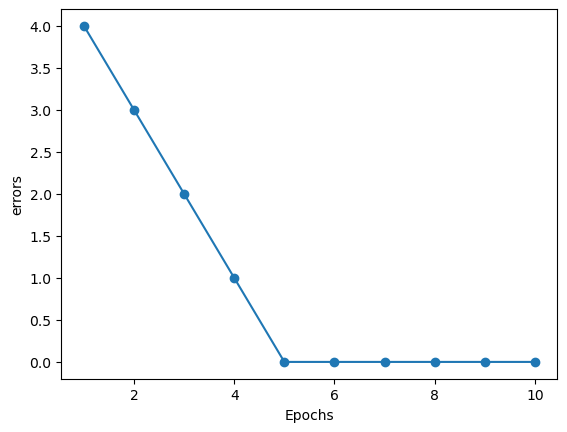

In [49]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('errors')
plt.show()